<a href="https://colab.research.google.com/github/Icee21/Telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing functions
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn import set_config
set_config(display='diagram')

In [ ]:
#load the dataset
filename = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filename)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#check the info of dataset
df.info()

# there are 2 int features, 1 float features and 18 object features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#check the shape
df.shape

# There is 7043 rows and 21 cols

(7043, 21)

In [ ]:
#check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#check statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning

Check Duplicted Data

In [ ]:
#check duplicated data
df.duplicated().sum()

# there is no duplicated data

0

Missing Values

In [ ]:
df.isna().sum()

# There is no missing data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# get column names

cols_name = df.columns
cols_name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# rename cols name to make it more readable
df = df.rename (columns = {'customerID': 'customer_id',
                           'SeniorCitizen': 'senior_citizen',
                           'PhoneService': 'phone_service',
                           'MultipleLines': 'multiple_lines',
                           'InternetService': 'internet_service',
                           'OnlineSecurity': 'online_security',
                           'OnlineBackup': 'online_backup',
                           'DeviceProtection': 'device_protection',
                           'TechSupport': 'tech_support',
                           'StreamingTV': 'streaming_tv',
                           'StreamingMovies': 'streaming_movies',
                           'PaperlessBilling': 'paper_less_biling',
                           'PaymentMethod': 'payment_method',
                           'MonthlyCharges': 'monthly_charges',
                           'TotalCharges': 'total_charges',
                           })

# print df
df.head()

,customer_id,gender,senior_citizen,Partner,Dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,Contract,paper_less_biling,payment_method,monthly_charges,total_charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  paper_less_biling  7043 

In [ ]:
#check the Churn Value counts
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

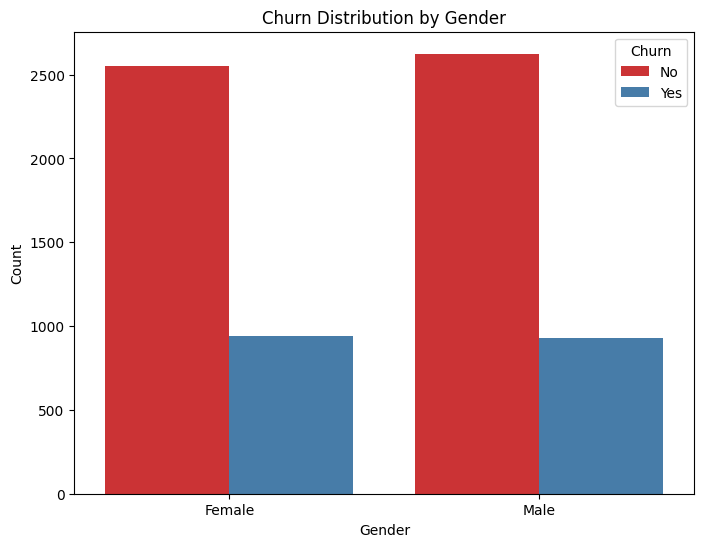

In [ ]:
# Bar plot for Gender vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


* The majority of both male and female customers have not churned ("No" churn). This is a positive outcome, indicating that a significant portion of customers has remained with the telecom company.

* The "Yes" churn bars for both genders are lower, suggesting that a smaller proportion of customers, regardless of gender, have churned. This is generally a favorable result, as it indicates a lower churn rate.

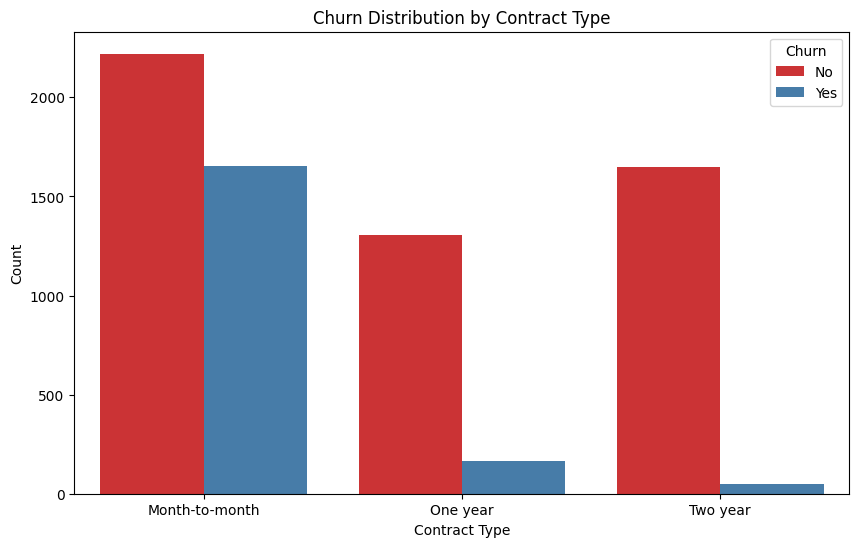

In [ ]:
# Bar plot for Contract vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

* Month-to-Month Contract:

No Churn (Churn = No): The highest bar is for "No" churn, suggesting that a significant number of customers with month-to-month contracts have not churned.
Churn (Churn = Yes): The "Yes" churn bar is slightly lower than the "No" churn bar, indicating that there is a portion of customers with month-to-month contracts who have churned. This suggests that customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts.

* One-Year Contract:

No Churn (Churn = No): The "No" churn bar is relatively high for one-year contracts, indicating that a substantial number of customers with one-year contracts have not churned.
Churn (Churn = Yes): The "Yes" churn bar is lower than the "No" churn bar, suggesting that customers with one-year contracts are less likely to churn compared to month-to-month contract customers.

* Two-Year Contract:

No Churn (Churn = No): The "No" churn bar is high for two-year contracts, indicating that a significant number of customers with two-year contracts have not churned.
Churn (Churn = Yes): The "Yes" churn bar is lower than the "No" churn bar, suggesting that customers with two-year contracts are the least likely to churn compared to both month-to-month and one-year contract customers.


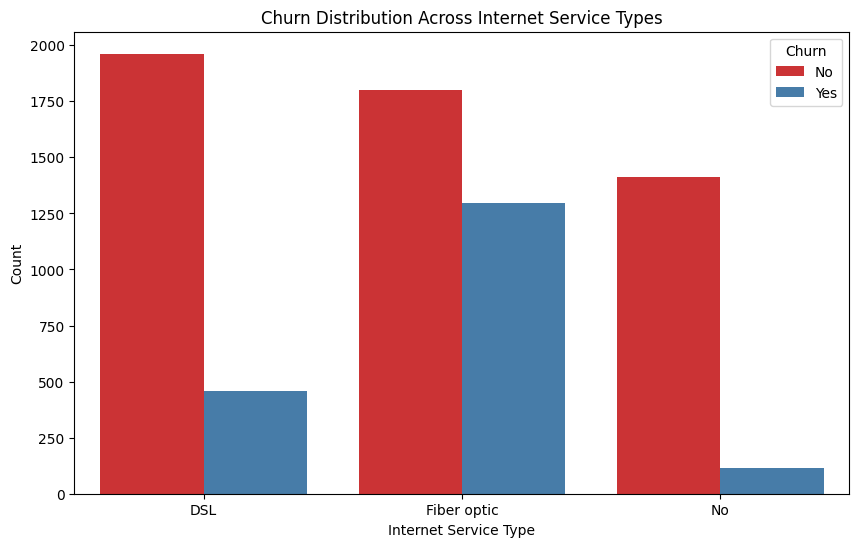

In [ ]:
# Bar plot for Internet Service vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='internet_service', hue='Churn', data=df, palette='Set1')
plt.title('Churn Distribution Across Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

DSL Internet Service:

* No Churn (Stay): High count, indicating that a significant number of customers with DSL internet service tend to stay.
Churn (Leave): Slightly lower count, suggesting that the churn rate for customers with DSL is relatively low.

Fiber Optic Internet Service:

* No Churn (Stay): High count, indicating that many customers with Fiber optic internet service tend to stay.
Churn (Leave): Also high, but slightly lower than the No Churn count. This suggests that while Fiber optic has a high retention rate, it experiences a notable churn rate compared to DSL.

No Internet Service:

* No Churn (Stay): High count, suggesting that customers without internet service (possibly those using only voice services) have a high retention rate.
Churn (Leave): Low count, indicating that the churn rate for customers without internet service is relatively low.

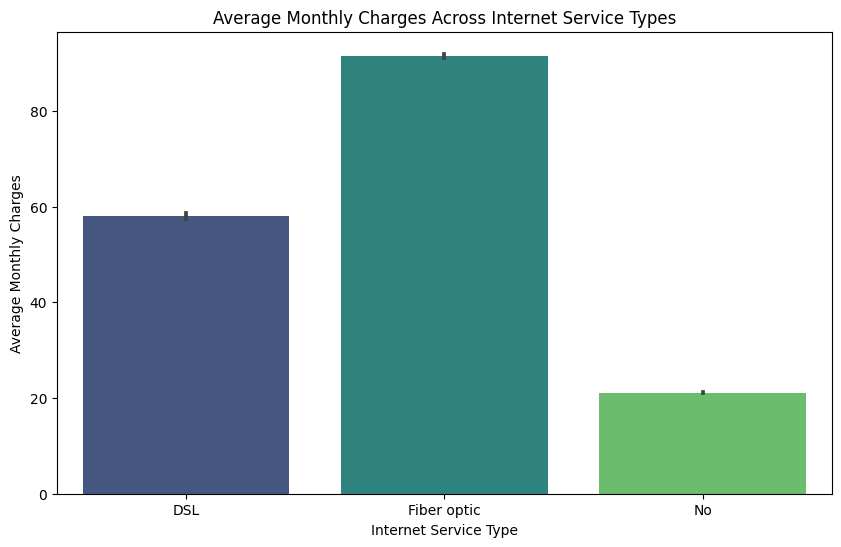

In [ ]:
# Create a bar chart to compare average monthly charges across InternetService categories
plt.figure(figsize=(10, 6))
sns.barplot(x='internet_service', y='monthly_charges', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Internet Service Type')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges Across Internet Service Types')

# Show the plot
plt.show()

Fiber Optic:

* The highest average monthly charges indicate that customers who choose to stay with Fiber Optic have high bills. This might be due to premium features, high-speed internet, or additional services offered with Fiber optic plans.

DSL:

* While slightly lower than Fiber optic, the average monthly charges for DSL-staying customers are still relatively high. This suggests that DSL customers who stay are willing to pay a substantial amount for their services.

No Internet Service:

* Despite the absence of internet service, customers who stay have high average monthly charges. This might be due to other services such as voice or bundled packages that contribute to the overall bill.

# Prepare the data appropriately for Modeling

In [ ]:
new = df.columns

In [ ]:
#Check and address any impossible values
for cols in new:
  print (f'Column Name: {cols}\n')
  print (df[cols].unique())
  print ('\n')
  print ('-' * 50)
  print ('\n')

Column Name: customer_id

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


--------------------------------------------------


Column Name: gender

['Female' 'Male']


--------------------------------------------------


Column Name: senior_citizen

[0 1]


--------------------------------------------------


Column Name: Partner

['Yes' 'No']


--------------------------------------------------


Column Name: Dependents

['No' 'Yes']


--------------------------------------------------


Column Name: tenure

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


--------------------------------------------------


Column Name: phone_service

['No' 'Yes']


--------------------------------------------------


Column Name: multiple_lines

['No phone service' 'No' 'Yes']


--------

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].replace({'Yes' : '1', 'No': '0'}, inplace = True)

In [ ]:
#arrange data into features matrix and target vector

y = df['Churn']
X = df.drop(columns = 'Churn')

In [ ]:
#Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

In [ ]:
#Selectors
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include= 'object')

In [ ]:
#scaler
scaler = StandardScaler()
#OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [ ]:
#tuples for column transformer
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [ ]:
#column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple , remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d68ffa96890>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d68ffa97820>)])

In [ ]:
#fit on the train

preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d68ffa96890>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d68ffa97820>)])

In [ ]:
# transform train and test

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
#check the missing values and the data Scaled and OneHotEncoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in test data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of the data', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in test data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of the data (5282, 10285)




array([[-0.43977565,  1.60960809, -0.37146069, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43977565, -1.15178048, -0.62503158, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43977565,  0.9598696 , -1.44706533, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.43977565,  1.56899943,  1.47148594, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43977565, -0.33960737, -1.47358254, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43977565, -1.07056317, -1.46529591, ...,  0.        ,
         0.        ,  0.        ]])

# Create and compare at least 2 different models

In [ ]:
#Instantiate the model
dec = DecisionTreeClassifier()

#fit the model
dec.fit(X_train_processed, y_train)

DecisionTreeClassifier()

In [ ]:
#create a prediction
dec_train_pred = dec.predict(X_train_processed)
dec_test_pred = dec.predict(X_test_processed)

In [ ]:
print('Classification Report of Decision Tree Classifier for Training Set')
train_report = classification_report(y_train, dec_train_pred)
print(train_report)

print('Classification Report of Decision Tree Classifier for Testing Set')
test_report = classification_report(y_test, dec_test_pred)
print(test_report)

Classification Report of Decision Tree Classifier for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      1.00      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282

Classification Report of Decision Tree Classifier for Testing Set
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1294
           1       0.57      0.48      0.52       467

    accuracy                           0.77      1761
   macro avg       0.70      0.68      0.68      1761
weighted avg       0.76      0.77      0.76      1761



* The model performs exceptionally well on the training set, achieving perfect precision, recall, and F1-score for both classes.
* On the testing set, the model's performance is good, but there is a decrease in precision, recall, and F1-score, indicating some challenges in generalizing to new, unseen data.
* There's a class imbalance issue, particularly for the "Yes" class, where precision, recall, and F1-score are lower. This suggests that the model might struggle with correctly identifying instances of churn.

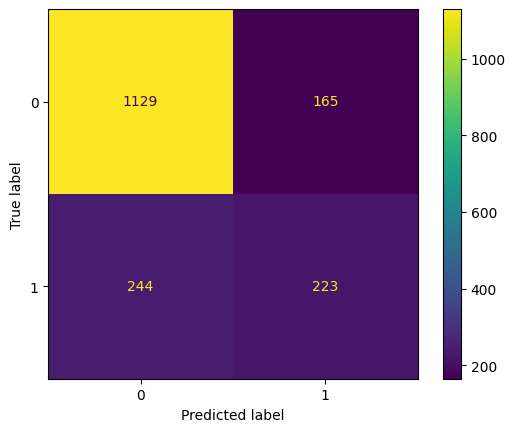

In [ ]:
#Confusion Matrix for Decision Tree Classifier
ConfusionMatrixDisplay.from_predictions(y_test, dec_test_pred)

# KNN Model

In [ ]:
#instantiate the model

knn = KNeighborsClassifier()

#fit the model
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [ ]:
#make prdedictions

knn_train_pred = knn.predict(X_train_processed)
knn_test_pred = knn.predict(X_test_processed)

In [ ]:
print('Classification Report for Training Set of KNN')
train_report = classification_report(y_train, knn_train_pred)
print(train_report)

print('Classification Report for Testing Set of KNN')
test_report = classification_report(y_test, knn_test_pred)
print(test_report)

Classification Report for Training Set of KNN
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3880
           1       0.71      0.66      0.68      1402

    accuracy                           0.84      5282
   macro avg       0.79      0.78      0.79      5282
weighted avg       0.83      0.84      0.84      5282

Classification Report for Testing Set of KNN
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1294
           1       0.55      0.56      0.56       467

    accuracy                           0.76      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.76      0.76      0.76      1761



* The KNN model demonstrates reasonable performance on both the training and testing sets.
* Precision, recall, and F1-score are balanced, but there is room for improvement, especially for the "Yes" churn class.
* Consider further exploration, hyperparameter tuning, or trying different classification algorithms to enhance model performance.

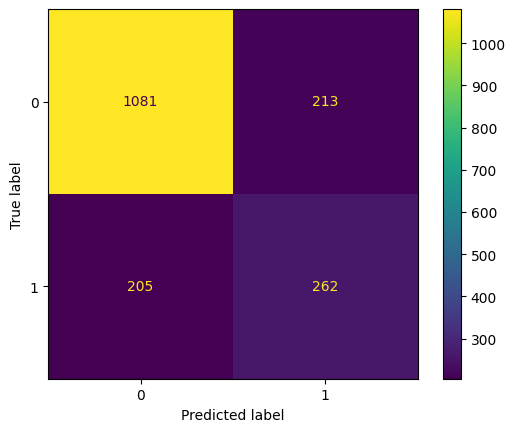

In [ ]:
#Confusion Matrix for Decision Tree Classifier
ConfusionMatrixDisplay.from_predictions(y_test,knn_test_pred)

In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
# instantiate the model
xgb = XGBClassifier()

#xgb_pipe = make_pipeline(X_train_processed, xgb)
# fit the model
xgb.fit(X_train_processed, y_train)

#make prdedictions

xgb_train_pred = xgb.predict(X_train_processed)
xgb_test_pred = xgb.predict(X_test_processed)

print('Classification Report for Training Set of XGB')
train_report = classification_report(y_train, xgb_train_pred)
print(train_report)

print('Classification Report for Testing Set of XGB')
test_report = classification_report(y_test, xgb_test_pred)
print(test_report)

Classification Report for Training Set of XGB
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3880
           1       0.90      0.84      0.87      1402

    accuracy                           0.93      5282
   macro avg       0.92      0.90      0.91      5282
weighted avg       0.93      0.93      0.93      5282

Classification Report for Testing Set of XGB
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.50      0.55       467

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



* The model performs well on the training set with high precision, recall, and F1-scores for both classes.
* On the testing set, there is a decrease in performance, especially for class 1 (churn), indicating some challenges in generalizing to new data.
* Precision, recall, and F1-scores provide a comprehensive view of the model's performance.

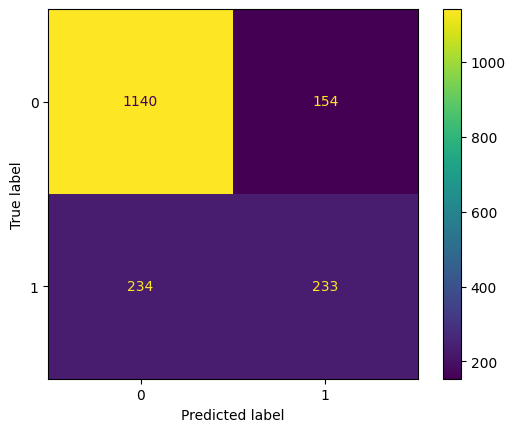

In [ ]:
#Confusion Matrix for Decision Tree Classifier
ConfusionMatrixDisplay.from_predictions(y_test,xgb_test_pred)